# A prefeitura e os seus gastos declarados no combate a COVID-19

http://www.transparencia.feiradesantana.ba.gov.br/index.php?view=despesascovid


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


despesas = pd.read_csv('despesas-covid-30.05.2020.csv')
despesas.head()

,action,company_or_person,crawled_at,crawled_from,date,document,function,group,number,phase,process_number,published_at,resource,subfunction,summary,type_of_process,value
0,2292 - Enfrentamento da Emergencia Coronavirus...,CENTRAL IMPORT DISTRIBUICAO DE FERRAGENS EIRELI,2020-05-30 13:17:41.109317,http://www.transparencia.feiradesantana.ba.gov...,28/05/2020,11.558.207/0001-00,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,20000306,EMPENHO,118-2020-1123D,28/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE EM CARATER DE EMERGENCIA DEV...,Dispensa,"R$ 17.390,00"
1,2292 - Enfrentamento da Emergencia Coronavirus...,SAJMED PRODUTOS HOSPITALAR DESCARTAVEL LTDA,2020-05-30 13:17:41.126095,http://www.transparencia.feiradesantana.ba.gov...,28/05/2020,07.492.639/0001-80,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,20000307,EMPENHO,119-2020-1123D,28/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE EM CARATER DE EMERGENCIA DEV...,Dispensa,"R$ 17.000,00"
2,2292 - Enfrentamento da Emergencia Coronavirus...,MALEIKO CONFECCOES EIRELI,2020-05-30 13:17:41.128380,http://www.transparencia.feiradesantana.ba.gov...,28/05/2020,11.967.826/0001-40,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,1,LIQUIDAÇÃO,90-2020-1123D,28/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE MATERIAL PARA PROTECAO. CONF...,Dispensa,"R$ 124.800,00"
3,2292 - Enfrentamento da Emergencia Coronavirus...,MALEIKO CONFECCOES EIRELI,2020-05-30 13:17:41.130081,http://www.transparencia.feiradesantana.ba.gov...,26/05/2020,11.967.826/0001-40,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,20000299,EMPENHO,114-2020-1123D,26/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE MASCARAS PF 2/N95 VISANDO PR...,Dispensa,"R$ 23.146,50"
4,2292 - Enfrentamento da Emergencia Coronavirus...,MALEIKO CONFECCOES EIRELI,2020-05-30 13:17:41.131808,http://www.transparencia.feiradesantana.ba.gov...,26/05/2020,11.967.826/0001-40,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,20000299,EMPENHO,114-2020-1123D,26/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE MASCARAS PF 2/N95 VISANDO PR...,Dispensa,"R$ 23.146,50"


In [2]:
colunas = ['crawled_at', 'crawled_from']
despesas.drop(colunas, inplace=True, axis=1)


def currency_to_float(value):
    """Converte de R$ 69.848,70 (str) para 69848.70 (float)."""
    try:
        cleaned_value = value.replace("R$", "").replace(".", "").replace(",", ".")
        return float(cleaned_value)
    except ValueError:
        pass
    return

despesas['value'] = despesas['value'].apply(currency_to_float)

despesas = despesas.sort_values('date', ascending=False)
despesas.head()

,action,company_or_person,date,document,function,group,number,phase,process_number,published_at,resource,subfunction,summary,type_of_process,value
158,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,29/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,18,LIQUIDAÇÃO,237-2019,29/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,3910.23
1,2292 - Enfrentamento da Emergencia Coronavirus...,SAJMED PRODUTOS HOSPITALAR DESCARTAVEL LTDA,28/05/2020,07.492.639/0001-80,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,20000307,EMPENHO,119-2020-1123D,28/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE EM CARATER DE EMERGENCIA DEV...,Dispensa,17000.00
0,2292 - Enfrentamento da Emergencia Coronavirus...,CENTRAL IMPORT DISTRIBUICAO DE FERRAGENS EIRELI,28/05/2020,11.558.207/0001-00,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,20000306,EMPENHO,118-2020-1123D,28/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE EM CARATER DE EMERGENCIA DEV...,Dispensa,17390.00
2,2292 - Enfrentamento da Emergencia Coronavirus...,MALEIKO CONFECCOES EIRELI,28/05/2020,11.967.826/0001-40,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,1,LIQUIDAÇÃO,90-2020-1123D,28/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE MATERIAL PARA PROTECAO. CONF...,Dispensa,124800.00
159,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,20301482,EMPENHO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,"REF. SERVICO PUBLICITARIO, NO AMBITO DA ADMINI...",Pregao,120000.00


In [3]:
# disponível em: https://gist.github.com/anapaulagomes/379525586f941a1183aa448dad282f90#file-especificacao-despesas-tcm-bahia-csv

classificacao = pd.read_csv(
    'especificacao-despesas-tcm-bahia.csv',
    dtype={'Codigo': str, 'Descricao': str, 'Codigo Superior': str}
)
classificacao

,Codigo,Descricao,Codigo Superior
0,30000000,Despesas Correntes,0
1,31000000,Pessoal e Encargos Sociais,30000000
2,31300000,Transferências a Estados e ao Distrito Federal,31000000
3,31301100,Vencimentos e Vantagens Fixas - Pessoal Civil,31300000
4,31301101,Vencimento e vantagens fixas Pessoal Civil (Ve...,31301100
...,...,...,...
2479,77999999,Reserva Orçamentária do RPPS,77999900
2480,88880000,Recursos Provenientes de Veto,0
2481,88888800,Recursos Provenientes de Veto,88880000
2482,99999900,Reservas,0


In [4]:
despesas['classificacao'] = despesas['group'].str.extract('(\d{8})')

despesas_com_classificacao = despesas.merge(classificacao, left_on=['classificacao'], right_on=['Codigo'], how='left')
despesas_com_classificacao

,action,company_or_person,date,document,function,group,number,phase,process_number,published_at,resource,subfunction,summary,type_of_process,value,classificacao,Codigo,Descricao,Codigo Superior
0,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,29/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,18,LIQUIDAÇÃO,237-2019,29/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,3910.23,33903901,33903901,Publicidade e Propaganda,33903900
1,2292 - Enfrentamento da Emergencia Coronavirus...,SAJMED PRODUTOS HOSPITALAR DESCARTAVEL LTDA,28/05/2020,07.492.639/0001-80,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,20000307,EMPENHO,119-2020-1123D,28/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE EM CARATER DE EMERGENCIA DEV...,Dispensa,17000.00,33903099,33903099,Material de Consumo – Outros,33903000
2,2292 - Enfrentamento da Emergencia Coronavirus...,CENTRAL IMPORT DISTRIBUICAO DE FERRAGENS EIRELI,28/05/2020,11.558.207/0001-00,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,20000306,EMPENHO,118-2020-1123D,28/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE EM CARATER DE EMERGENCIA DEV...,Dispensa,17390.00,33903099,33903099,Material de Consumo – Outros,33903000
3,2292 - Enfrentamento da Emergencia Coronavirus...,MALEIKO CONFECCOES EIRELI,28/05/2020,11.967.826/0001-40,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,1,LIQUIDAÇÃO,90-2020-1123D,28/05/2020,0050 - Rec. Proprias de Entidades de Adm. Indi...,122 - ADMINISTRACAO GERAL,REF: AQUISICAO DE MATERIAL PARA PROTECAO. CONF...,Dispensa,124800.00,33903099,33903099,Material de Consumo – Outros,33903000
4,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,20301482,EMPENHO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,"REF. SERVICO PUBLICITARIO, NO AMBITO DA ADMINI...",Pregao,120000.00,33903901,33903901,Publicidade e Propaganda,33903900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,04/05/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,3683,PAGAMENTO,237-2019,04/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,21376.26,33903901,33903901,Publicidade e Propaganda,33903900
375,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,04/05/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,3682,PAGAMENTO,237-2019,04/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,5925.00,33903901,33903901,Publicidade e Propaganda,33903900
376,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,04/05/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,3681,PAGAMENTO,237-2019,04/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,6750.00,33903901,33903901,Publicidade e Propaganda,33903900
377,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,04/05/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,3680,PAGAMENTO,237-2019,04/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,17100.00,33903901,33903901,Publicidade e Propaganda,33903900


In [5]:
despesas.shape, despesas_com_classificacao.shape

((379, 16), (379, 19))

In [6]:
despesas.groupby('process_number').count()

despesas.groupby(['process_number', 'phase'])['value'].sum().to_frame()

value
process_number phase                 
112-2020-1123D EMPENHO      195000.00
114-2020-1123D EMPENHO       46293.00
118-2020-1123D EMPENHO       17390.00
119-2020-1123D EMPENHO       17000.00
237-2019       EMPENHO     1535000.00
               LIQUIDAÇÃO  1395891.71
               PAGAMENTO   1362061.73
302-2020-11D   EMPENHO      205148.16
               LIQUIDAÇÃO   205114.56
               PAGAMENTO    205114.56
303-2020-11D   EMPENHO       39931.92
               LIQUIDAÇÃO    39931.92
               PAGAMENTO     39931.92
313-2020-11D   EMPENHO        4500.00
               LIQUIDAÇÃO     4500.00
               PAGAMENTO      4500.00
315-2020-11D   EMPENHO        4940.00
               LIQUIDAÇÃO     4940.00
               PAGAMENTO      4940.00
316-2020-11D   EMPENHO      197671.20
               LIQUIDAÇÃO   155785.20
               PAGAMENTO    311570.40
317-2020-11D   EMPENHO       95700.00
               LIQUIDAÇÃO    95700.00
               PAGAMENTO     95700.00
331-2020-11D   EMPENHO      224000.00
               LIQUIDAÇÃO   224000.00
               PAGAMENTO    224000.00
332-2020-11D   EMPENHO      147750.00
               LIQUIDAÇÃO    89350.00
               PAGAMENTO     89350.00
334-2020-11D   EMPENHO     1062220.00
               LIQUIDAÇÃO   753840.00
               PAGAMENTO    696840.00
336-2020-11D   EMPENHO       71850.00
359-2020-11D   EMPENHO       36500.00
362-2020-11D   EMPENHO       48816.00
               LIQUIDAÇÃO    48816.00
               PAGAMENTO     48816.00
363-2020-11D   EMPENHO       49925.00
               LIQUIDAÇÃO    49925.00
               PAGAMENTO     49925.00
364-2020-11D   EMPENHO       62843.00
376-2020-11D   EMPENHO       29400.00
               LIQUIDAÇÃO    29400.00
               PAGAMENTO     29400.00
377-2020-11D   EMPENHO       23345.00
               LIQUIDAÇÃO    23345.00
               PAGAMENTO     23345.00
384-2020-11D   EMPENHO      145304.00
386-2020-11D   EMPENHO     9083008.21
               LIQUIDAÇÃO   750000.00
               PAGAMENTO    750000.00
394-2020-11D   EMPENHO      195000.00
87-2020-1123D  EMPENHO     1350000.00
88-2020-1123D  EMPENHO       64000.00
89-2020-1123   EMPENHO      103998.40
90-2020-1123D  EMPENHO      240499.20
               LIQUIDAÇÃO   124800.00

In [7]:
import seaborn as sns
sns.set_style("whitegrid")

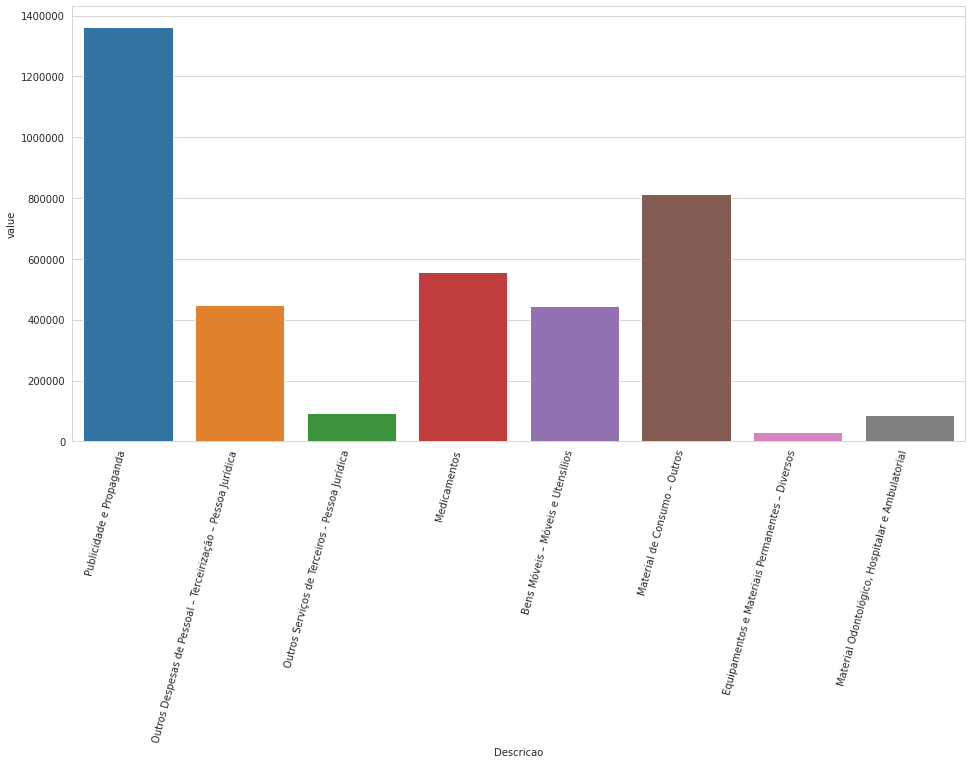

In [8]:
pagamentos = despesas_com_classificacao[despesas_com_classificacao['phase'] == 'PAGAMENTO']

plt.figure(figsize=(16,8))
plot = sns.barplot(
    x=pagamentos['Descricao'],
    y=pagamentos.value,
    estimator=sum,
    log=False,
    ci=None,
)
plot.set_xticklabels(plot.get_xticklabels(), rotation=75, horizontalalignment='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [9]:
pagamentos.groupby(
    ['company_or_person']
)['value'].sum().to_frame()

,value
company_or_person,
4MBR COM. E REPRES MAT MED LTD,29400.00
A.C.PROPAGANDA LTDA.,806416.05
AGENCIA COMUN. EIRELI,37136.82
ASSOCIACAO DE PROTECAO A M. E INFANCIA UBAIRA - APMIU,750000.00
ATIVA COM.E PROPAGANDA LTDA,12446.30
C. F. DE ALMEIDA CIA. LTDA.,12600.00
CIDADE PROPAGANDA E MARKETING,506062.56
EQUIPE NA MIDIA LTDA,79790.00
FABMED-DISTRIBUIDORA HOSPITALAR LTDA,556616.88


In [10]:
pagamentos.groupby(
    ['Descricao']
)['value'].sum().to_frame()

,value
Descricao,
Bens Móveis – Móveis e Utensílios,443775.00
Equipamentos e Materiais Permanentes – Diversos,30950.00
"Material Odontológico, Hospitalar e Ambulatorial",86400.00
Material de Consumo – Outros,812201.00
Medicamentos,556616.88
Outros Despesas de Pessoal – Terceirização – Pessoa Jurídica,450000.00
Outros Serviços de Terceiros - Pessoa Jurídica,92390.00
Publicidade e Propaganda,1362061.73


In [11]:
print(pagamentos.describe())

# 64 pagamentos. Menor: 375 Maior: 365380.00
# Total: 2.244.342,32

print(pagamentos['value'].sum())

            number          value
count   225.000000     225.000000
mean   3955.195556   18397.042711
std     351.794363   53751.385342
min    3478.000000       3.000000
25%    3676.000000      95.300000
50%    3962.000000     364.410000
75%    4224.000000    6750.000000
max    4578.000000  450000.000000
4139334.61


In [12]:
# despesas_com_classificacao.to_csv('despesas-covid19-prefeitura.csv')
# https://drive.google.com/file/d/1SAkAuGuOnuBTC5KT133lJhsYCm40Hfxc/view?usp=sharing